In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

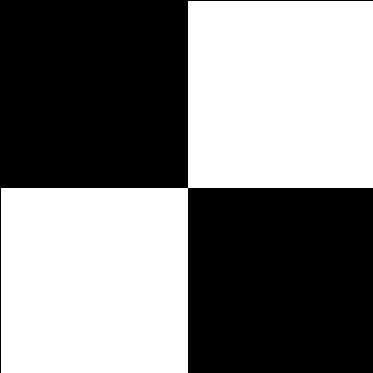

In [2]:
img = cv2.imread("board.png",0)
Image("board.png")

In [3]:
img.shape

(373, 373)

In [4]:
print(img)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]


Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0].

In [5]:
# the very first pixel
print(img[0,0])

print(img[2,200])  #white pixel value : 255

0
255


Modifying Image Pixels

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]


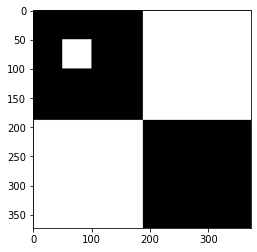

In [9]:
img_copy = img.copy()

img_copy[50:100 , 50:100] = 255   #used slicing to modify group of pixels

print(img_copy)

plt.imshow(img_copy , cmap="gray")

Cropping the Image

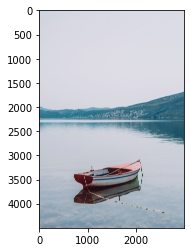

In [16]:
boat_scene = cv2.imread("boat.jpg" ,-1)
boat_scene_org = boat_scene[:, :, ::-1] #reversing the channels from bgr to rgb

plt.imshow(boat_scene_org)


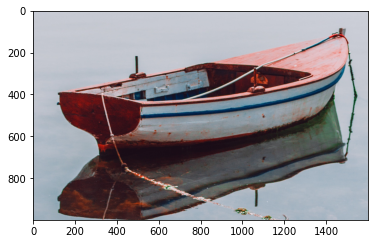

In [21]:
only_boat = boat_scene_org[3000:4000 , 600:2200]  # params : rows indices : column indices
plt.imshow(only_boat)

Resizing images using scaling factors

The function has 2 required arguments:

src: input image

dsize: output image size

Optional arguments that are often used include:

fx: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

fy: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

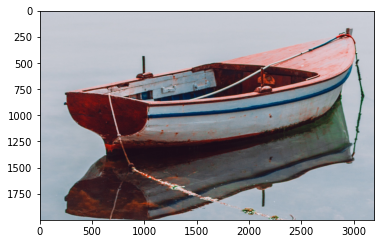

In [22]:
resized_only_boat_2x = cv2.resize(only_boat, None, fx=2, fy=2)
plt.imshow(resized_only_boat_2x)

Specifying exact size of the output image

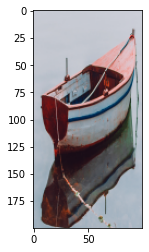

In [23]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)


resized_cropped_region = cv2.resize(only_boat, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

Resize while maintaining aspect ratio

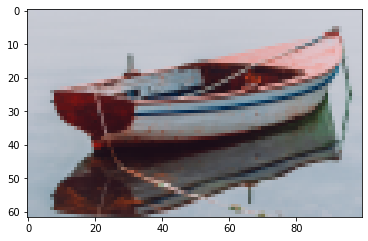

In [24]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / only_boat.shape[1]
desired_height = int(only_boat.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_only_boat = cv2.resize(only_boat, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_only_boat)

Flipping Images (flip function)

The function has 2 required arguments:

src: input image
flipCode: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

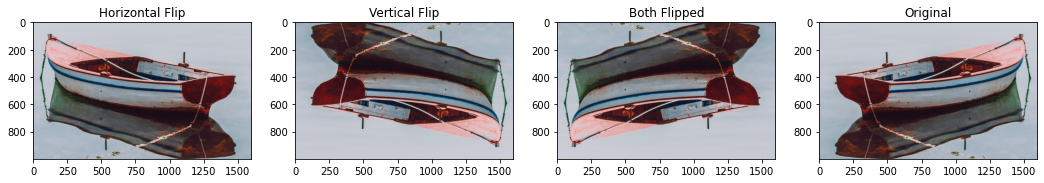

In [25]:
boat_horz = cv2.flip(only_boat, 1)
boat_vert = cv2.flip(only_boat, 0)
boat_both = cv2.flip(only_boat, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(boat_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(boat_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(boat_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(only_boat);plt.title("Original");

What is the purpose of the interpolation method parameter in cv2.resize?

The purpose of the interpolation method parameter in `cv2.resize()` is to specify how OpenCV should calculate the pixel values of the resized image. Different interpolation methods produce different results, so it is important to choose the right method for your application.

Here are the five interpolation methods available in `cv2.resize()`:

* **cv2.INTER_NEAREST:** This is the fastest interpolation method, but it also produces the lowest quality results. Nearest neighbor interpolation simply assigns the color value of the nearest existing pixel to the new pixel. This can result in jagged edges and blocky artifacts in the resized image.
* **cv2.INTER_LINEAR:** Bilinear interpolation is a good middle ground between nearest neighbor interpolation and bicubic interpolation. It is faster than bicubic interpolation, but it also produces slightly lower quality results. Bilinear interpolation averages the color values of four surrounding pixels to calculate the color value of the new pixel. This produces smoother transitions and fewer jagged edges than nearest neighbor interpolation.
* **cv2.INTER_AREA:** Area interpolation is a good choice for downscaling images, as it produces smooth results and minimizes aliasing effects. However, it is not recommended for upscaling images, as it can produce blurry results.
* **cv2.INTER_CUBIC:** Bicubic interpolation is the slowest interpolation method, but it also produces the highest quality results. Bicubic interpolation uses the color values of 16 surrounding pixels to calculate the color value of the new pixel. This produces smooth transitions and sharp edges in the resized image.
* **cv2.INTER_LANCZOS4:** Lanczos interpolation is similar to bicubic interpolation, but it produces slightly sharper results. Lanczos interpolation uses the color values of 64 surrounding pixels to calculate the color value of the new pixel.

Which interpolation method you choose will depend on your specific needs. If you need to resize an image quickly and do not mind sacrificing some quality, you can use nearest neighbor interpolation or bilinear interpolation. If you need to resize an image and produce the highest possible quality results, you should use bicubic interpolation or Lanczos interpolation.

Here are some general guidelines for choosing an interpolation method:

* **Nearest neighbor:** Use for fast resizing and applications where quality is not critical, such as thumbnails or previews.
* **Bilinear:** Use for general-purpose resizing and applications where quality is important, but speed is also a factor.
* **Area:** Use for downscaling images to produce smooth results and minimize aliasing effects.
* **Cubic:** Use for upscaling or downscaling images to produce the highest possible quality results.
* **Lanczos:** Use for upscaling or downscaling images to produce slightly sharper results than bicubic interpolation.

Ultimately, the best way to choose an interpolation method is to experiment and see what produces the best results for your specific application.